In [3]:
import scipy.io 
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
for root, dirs, files in os.walk("Bach Project", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

Bach Project\0_load_48_KHz\14_BA.mat
Bach Project\0_load_48_KHz\14_IR.mat
Bach Project\0_load_48_KHz\14_OR1.mat
Bach Project\0_load_48_KHz\21_BA.mat
Bach Project\0_load_48_KHz\21_IR.mat
Bach Project\0_load_48_KHz\21_OR1.mat
Bach Project\0_load_48_KHz\21_OR2.mat
Bach Project\0_load_48_KHz\21_OR3.mat
Bach Project\0_load_48_KHz\7_BA.mat
Bach Project\0_load_48_KHz\7_IR.mat
Bach Project\0_load_48_KHz\7_OR1.mat
Bach Project\0_load_48_KHz\7_OR2.mat
Bach Project\0_load_48_KHz\7_OR3.mat
Bach Project\0_load_48_KHz\N.mat


In [7]:
path = r'Bach Project\0_load_48_KHz\7_OR3.mat'
mat = scipy.io.loadmat(path)

In [9]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 12:25:53 2000'), ('__version__', '1.0'), ('__globals__', []), ('X161_DE_time', array([[0.328152  ],
       [0.24011631],
       [0.15333231],
       ...,
       [0.16146831],
       [0.235944  ],
       [0.20027077]])), ('X161_FE_time', array([[-0.05156909],
       [ 0.00308182],
       [ 0.07273091],
       ...,
       [ 0.08362   ],
       [ 0.03472182],
       [ 0.05033636]])), ('X161RPM', array([[1796]], dtype=uint16))])

In [11]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X161_DE_time',
 'X161_FE_time',
 'X161RPM']

In [13]:
key_name = list(mat.keys())[3]

In [15]:
DE_data = mat.get(key_name)

In [17]:
file_name

'N.mat'

In [19]:
fault = np.full((len(DE_data), 1), file_name[:-4])

In [21]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

In [23]:
df_temp

,DE_data,fault
0,0.328152,N
1,0.240116,N
2,0.153332,N
3,0.070303,N
4,-0.000626,N
...,...,...
129964,0.103056,N
129965,0.137686,N
129966,0.161468,N
129967,0.235944,N


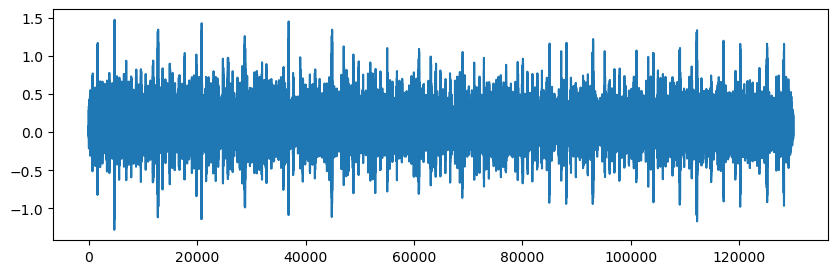

In [25]:
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0])
plt.show()

In [28]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("Bach Project", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('all_faults.csv',index=False)     

Bach Project\0_load_48_KHz\14_BA.mat
['14_BA']
Bach Project\0_load_48_KHz\14_IR.mat
['14_BA' '14_IR']
Bach Project\0_load_48_KHz\14_OR1.mat
['14_BA' '14_IR' '14_OR1']
Bach Project\0_load_48_KHz\21_BA.mat
['14_BA' '14_IR' '14_OR1' '21_BA']
Bach Project\0_load_48_KHz\21_IR.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR']
Bach Project\0_load_48_KHz\21_OR1.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1']
Bach Project\0_load_48_KHz\21_OR2.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2']
Bach Project\0_load_48_KHz\21_OR3.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3']
Bach Project\0_load_48_KHz\7_BA.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA']
Bach Project\0_load_48_KHz\7_IR.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR']
Bach Project\0_load_48_KHz\7_OR1.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR' '7_OR1']
Bach Project\0_load

In [29]:
df = pd.read_csv('all_faults.csv')

In [32]:
df

,DE_data,fault
0,0.039846,14_BA
1,0.089705,14_BA
2,0.136643,14_BA
3,0.177532,14_BA
4,0.205903,14_BA
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


In [118]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('all_faults.csv')
print(df.head())
print(df.info())
# Check for null values
print(df.isnull().sum())

    DE_data  fault
0  0.039846  14_BA
1  0.089705  14_BA
2  0.136643  14_BA
3  0.177532  14_BA
4  0.205903  14_BA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782629 entries, 0 to 2782628
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   DE_data  float64
 1   fault    object 
dtypes: float64(1), object(1)
memory usage: 42.5+ MB
None
DE_data    0
fault      0
dtype: int64


In [102]:

print("Null values in the dataset:")
print(df.isnull().sum())

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna('Unknown', inplace=True)

print("Null values after handling:")
print(df.isnull().sum())



Null values in the dataset:
DE_data              0
fault                0
DE_data_augmented    0
DE_data_shifted      0
DE_data_scaled       0
dtype: int64
Null values after handling:
DE_data              0
fault                0
DE_data_augmented    0
DE_data_shifted      0
DE_data_scaled       0
dtype: int64


In [106]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numeric_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

# Verify outliers are capped
print("Outlier statistics after capping:")
print(df[numeric_cols].describe())


Outlier statistics after capping:
            DE_data  DE_data_augmented  DE_data_shifted  DE_data_scaled
count  2.782629e+06       2.782629e+06     2.782629e+06    2.782629e+06
mean   9.591765e-02       9.594030e-02     9.591765e-02    9.577023e-02
std    3.265224e-01       3.259805e-01     3.265224e-01    3.232154e-01
min   -6.015866e-01      -6.026909e-01    -6.015866e-01   -6.001902e-01
25%   -7.178133e-02      -7.209215e-02    -7.178133e-02   -7.155691e-02
50%    7.092923e-02       7.102373e-02     7.092923e-02    7.063440e-02
75%    2.814222e-01       2.816404e-01     2.814222e-01    2.808653e-01
max    8.112274e-01       8.122391e-01     8.112274e-01    8.094986e-01


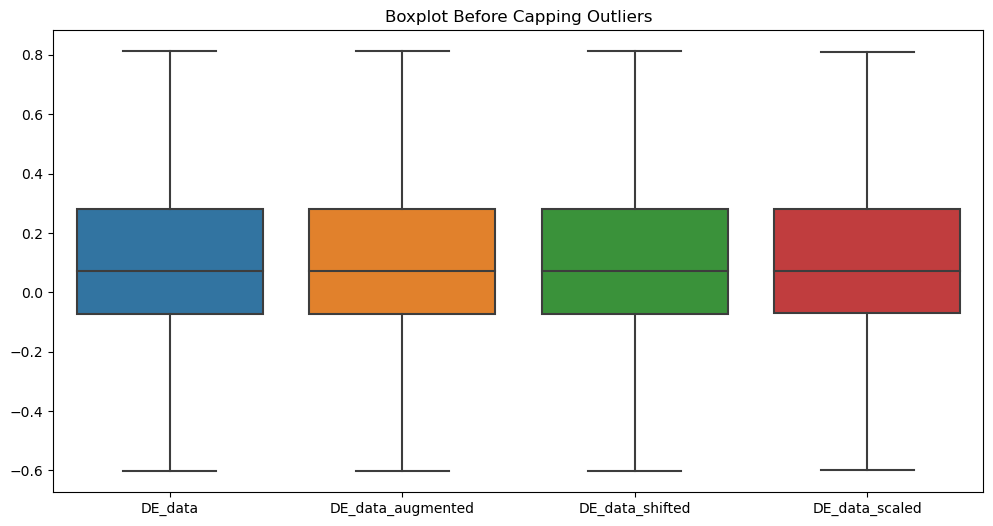

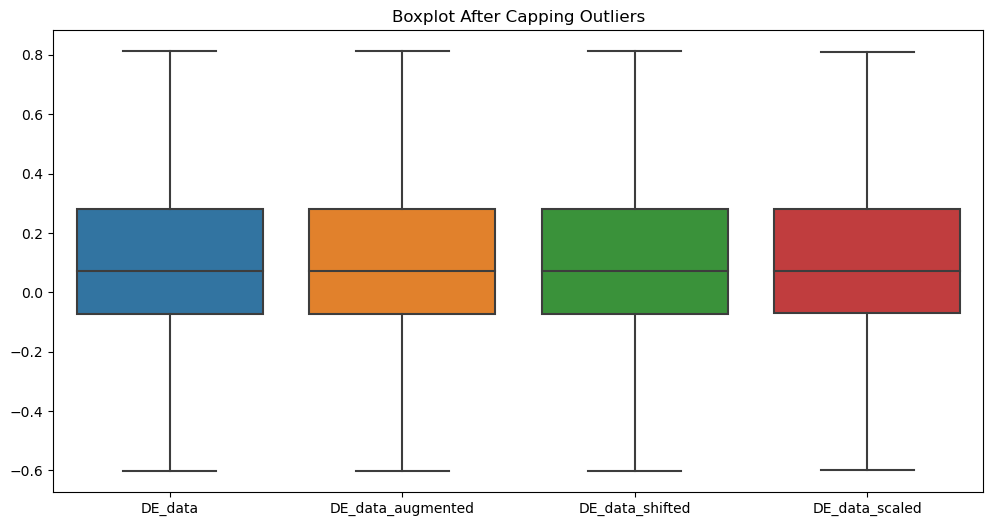

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

#before capping
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot Before Capping Outliers')
plt.show()

#after capping
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot After Capping Outliers')
plt.show()


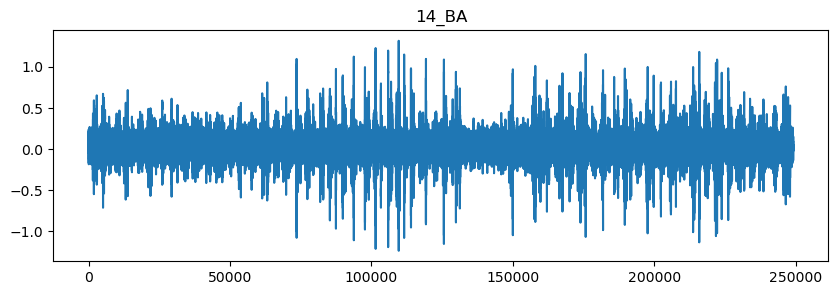

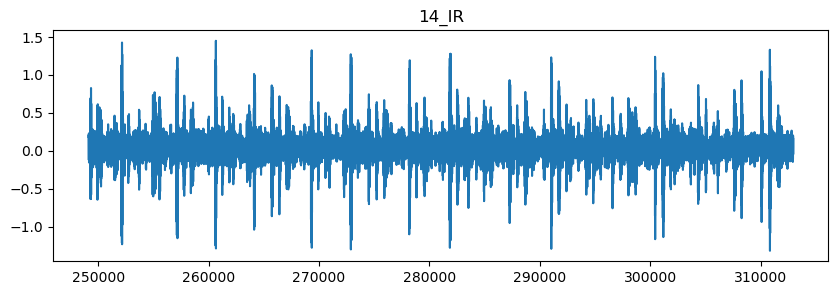

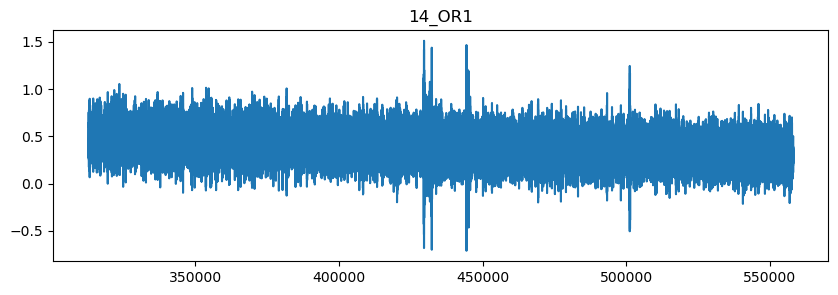

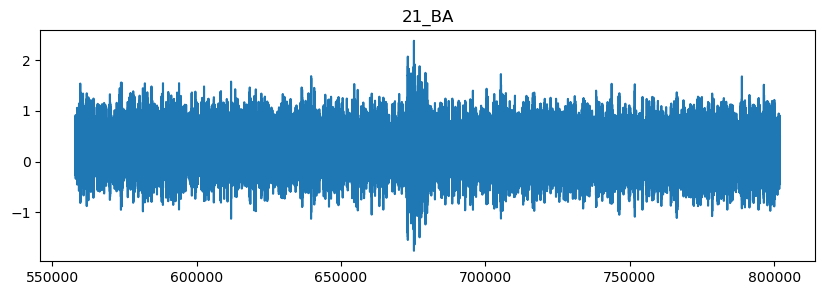

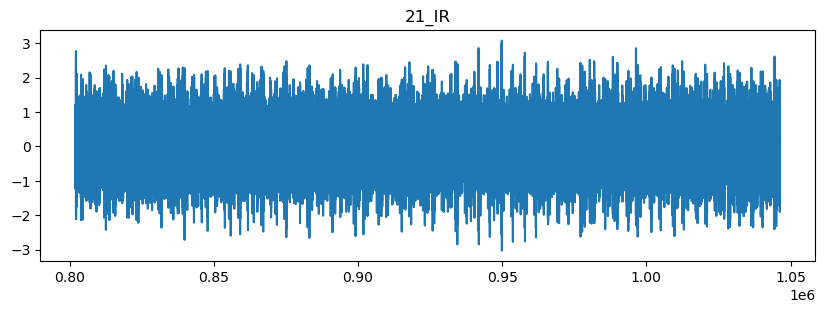

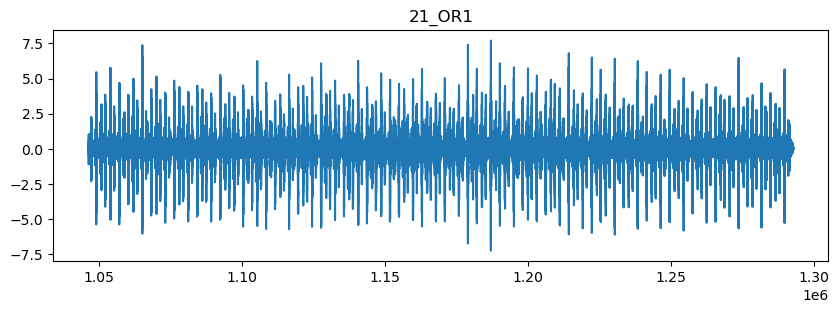

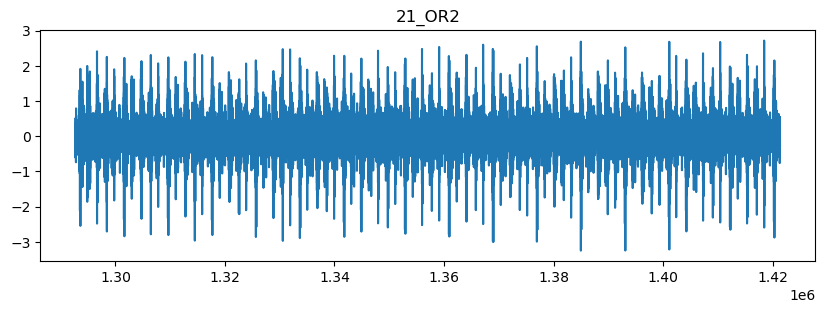

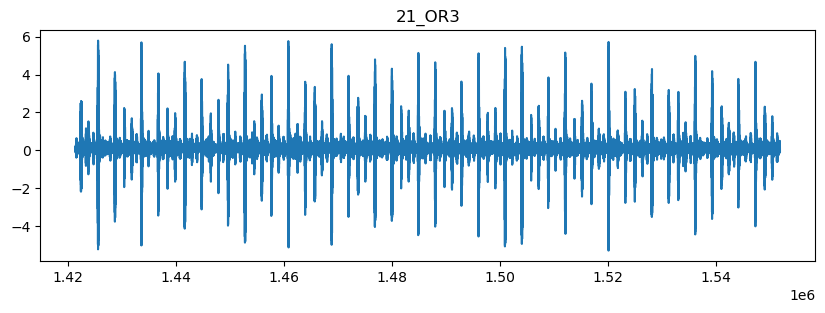

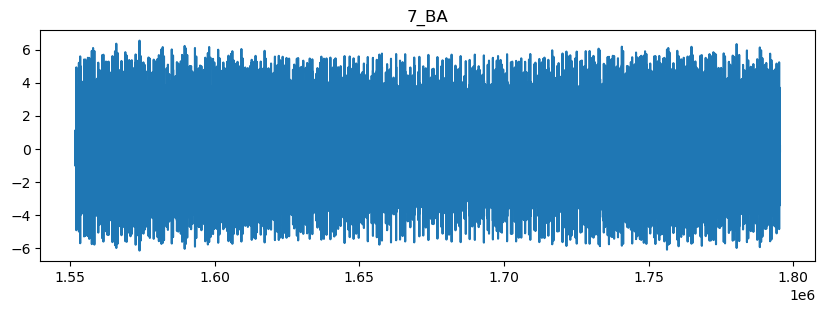

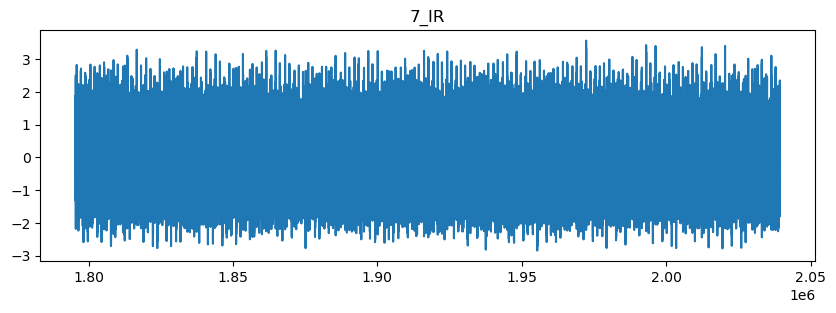

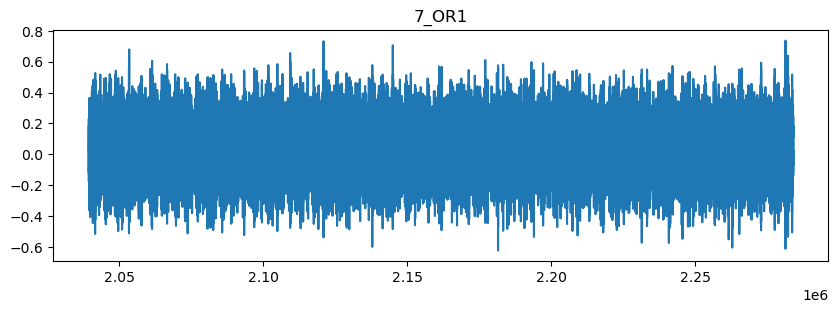

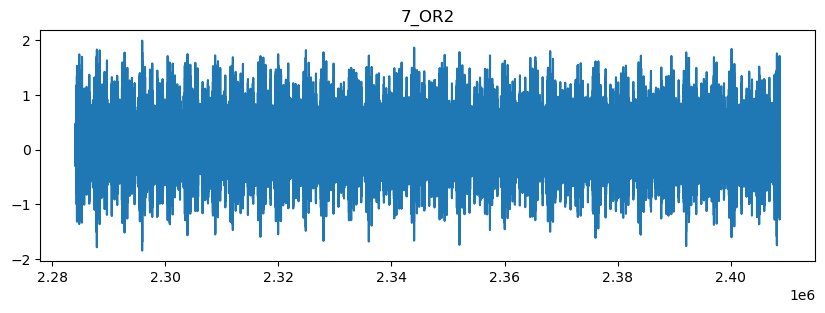

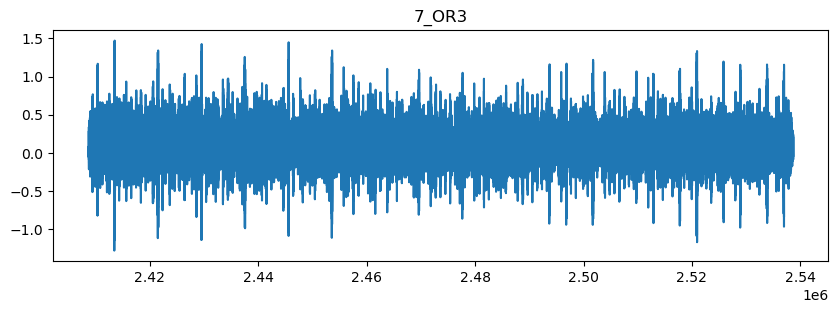

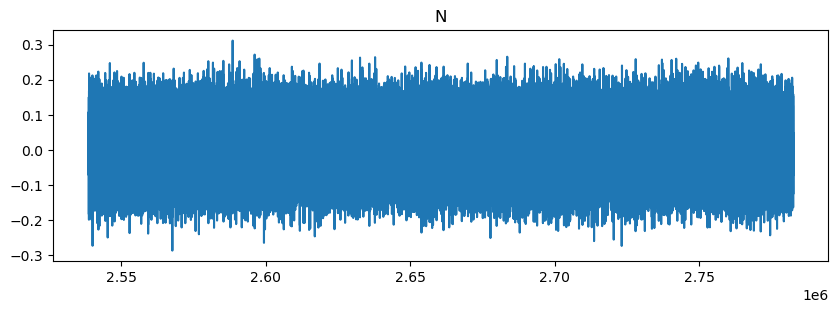

In [34]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

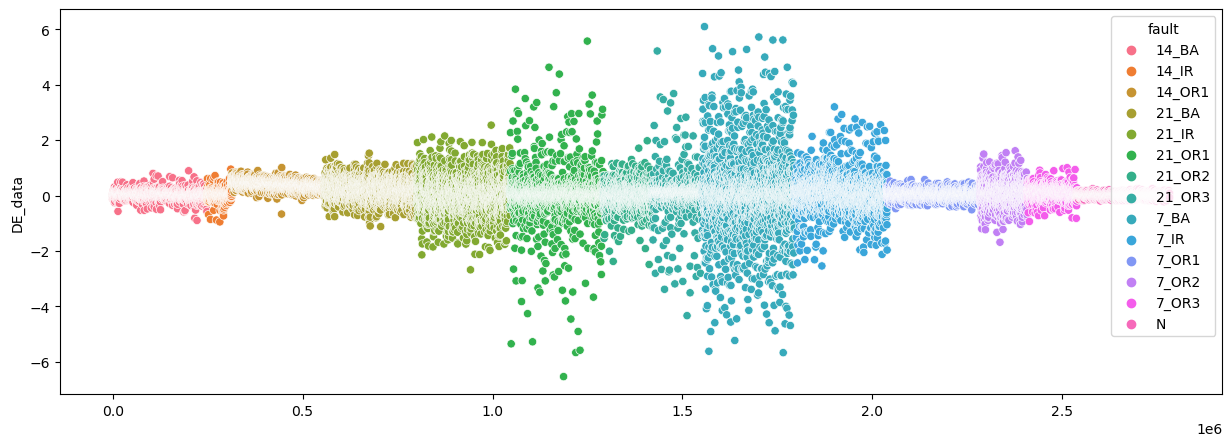

In [36]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()

In [38]:
df = pd.read_csv('all_faults.csv')

In [40]:
df

,DE_data,fault
0,0.039846,14_BA
1,0.089705,14_BA
2,0.136643,14_BA
3,0.177532,14_BA
4,0.205903,14_BA
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


In [42]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len = 500
stride = 300

X = []
Y = []

for k in df['fault'].unique():
    df_temp_2 = df[df['fault'] == k]
    for i in np.arange(0, len(df_temp_2) - (win_len), stride):
        temp = df_temp_2.iloc[i:i + win_len, :-1].values
        temp = temp.reshape((1, -1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i + win_len, -1])

X = np.array(X)
X = X.reshape((X.shape[0], -1, 1))

Y = np.array(Y)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [43]:
X.shape

(9259, 500, 1)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [48]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv1D,MaxPooling1D

no_classes = len(df['fault'].unique())

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=100, activation='relu', input_shape=(X.shape[1],X.shape[2])))
cnn_model.add(Conv1D(filters=32, kernel_size=50, activation='relu'))

cnn_model.add(MaxPooling1D(pool_size=4))
cnn_model.add(Flatten())
cnn_model.add(Dense(100,activation='relu'))
cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 401, 64)           6464      
                                                                 
 conv1d_1 (Conv1D)           (None, 352, 32)           102432    
                                                                 
 max_pooling1d (MaxPooling1  (None, 88, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2816)              0         
                                                                 
 dense (Dense)               (None, 100)               281700    
                                                                 
 dense_1 (Dense)             (None, 14)                1414      
                                                        

In [50]:
batch_size=300
epochs=20
history=cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
22/22 [==============================] - 35s 2s/step - loss: 1.8761 - accuracy: 0.3266 - val_loss: 1.2679 - val_accuracy: 0.5367
Epoch 2/20
22/22 [==============================] - 34s 2s/step - loss: 0.8249 - accuracy: 0.7176 - val_loss: 0.4851 - val_accuracy: 0.8643
Epoch 3/20
22/22 [==============================] - 32s 1s/step - loss: 0.3539 - accuracy: 0.8925 - val_loss: 0.2778 - val_accuracy: 0.9143
Epoch 4/20
22/22 [==============================] - 32s 1s/step - loss: 0.1790 - accuracy: 0.9458 - val_loss: 0.1540 - val_accuracy: 0.9489
Epoch 5/20
22/22 [==============================] - 32s 1s/step - loss: 0.1060 - accuracy: 0.9673 - val_loss: 0.0867 - val_accuracy: 0.9766
Epoch 6/20
22/22 [==============================] - 33s 2s/step - loss: 0.0856 - accuracy: 0.9722 - val_loss: 0.0921 - val_accuracy: 0.9744
Epoch 7/20
22/22 [==============================] - 33s 1s/step - loss: 0.0677 - accuracy: 0.9798 - val_loss: 0.0787 - val_accuracy: 0.9748
Epoch 8/20
22/22 [==

In [114]:
print("Training Accuracy: ", history.history['accuracy'])
print("Validation Accuracy: ", history.history['val_accuracy'])

final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

Training Accuracy:  [0.9996914267539978, 0.9998456835746765, 0.9998456835746765, 0.9998456835746765, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracy:  [0.9946004152297974, 0.9949604272842407, 0.9942404627799988, 0.9924405813217163, 0.9935204982757568, 0.9938805103302002, 0.9942404627799988, 0.9946004152297974, 0.9949604272842407, 0.9942404627799988, 0.9949604272842407, 0.9946004152297974, 0.9946004152297974, 0.9942404627799988, 0.9946004152297974, 0.9942404627799988, 0.9935204982757568, 0.9938805103302002, 0.9949604272842407, 0.9942404627799988]
Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.9942


87/87 [==============================] - 3s 38ms/step


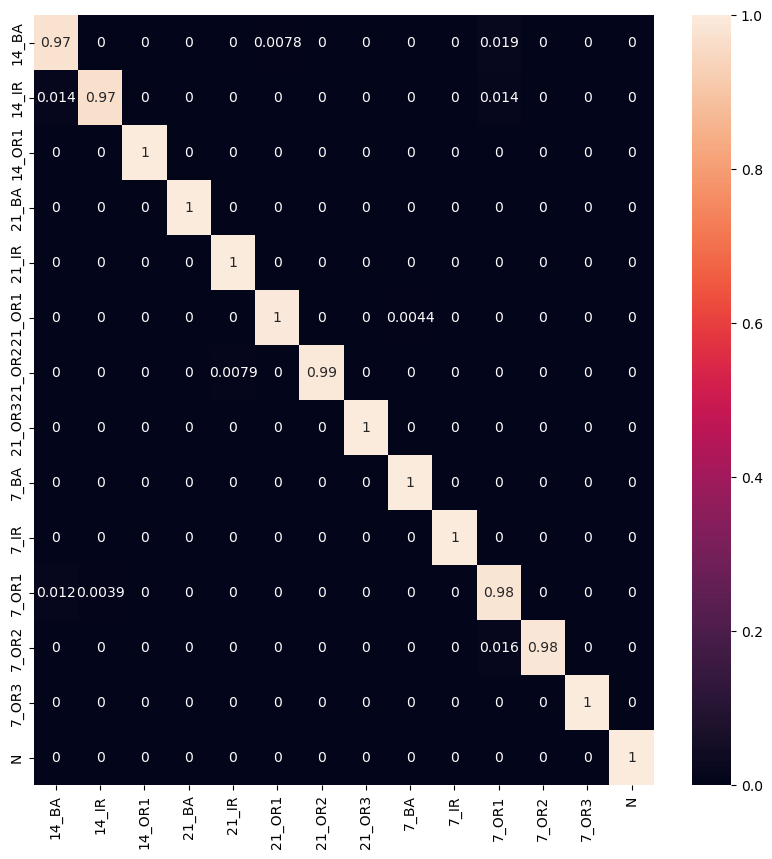

87/87 [==============================] - 3s 38ms/step
              precision    recall  f1-score   support

       14_BA       0.98      0.97      0.98       257
       14_IR       0.99      0.97      0.98        69
      14_OR1       1.00      1.00      1.00       252
       21_BA       1.00      1.00      1.00       236
       21_IR       1.00      1.00      1.00       259
      21_OR1       0.99      1.00      0.99       228
      21_OR2       1.00      0.99      1.00       126
      21_OR3       1.00      1.00      1.00       127
        7_BA       1.00      1.00      1.00       232
        7_IR       1.00      1.00      1.00       234
       7_OR1       0.97      0.98      0.98       255
       7_OR2       1.00      0.98      0.99       129
       7_OR3       1.00      1.00      1.00       125
           N       1.00      1.00      1.00       249

    accuracy                           0.99      2778
   macro avg       0.99      0.99      0.99      2778
weighted avg       0.99   

In [62]:
def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

y_pred=cnn_model.predict(X_test)

Y_pred=inv_Transform_result(y_pred)
Y_test=inv_Transform_result(y_test)

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred, normalize='true')
f = sns.heatmap(cm, annot=True, xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

from sklearn.metrics import classification_report

def inv_Transform_result(y_pred):
    y_pred = y_pred.argmax(axis=1)  # Convert predictions to class labels
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

# Get predictions and convert them to class labels
y_pred = cnn_model.predict(X_test)
y_pred_labels = inv_Transform_result(y_pred)

# Convert y_test to class labels (if needed)
y_test_labels = y_test.argmax(axis=1)  # Assuming y_test is one-hot encoded, convert to class labels
y_test_labels = encoder.inverse_transform(y_test_labels)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels))



87/87 [==============================] - 3s 37ms/step


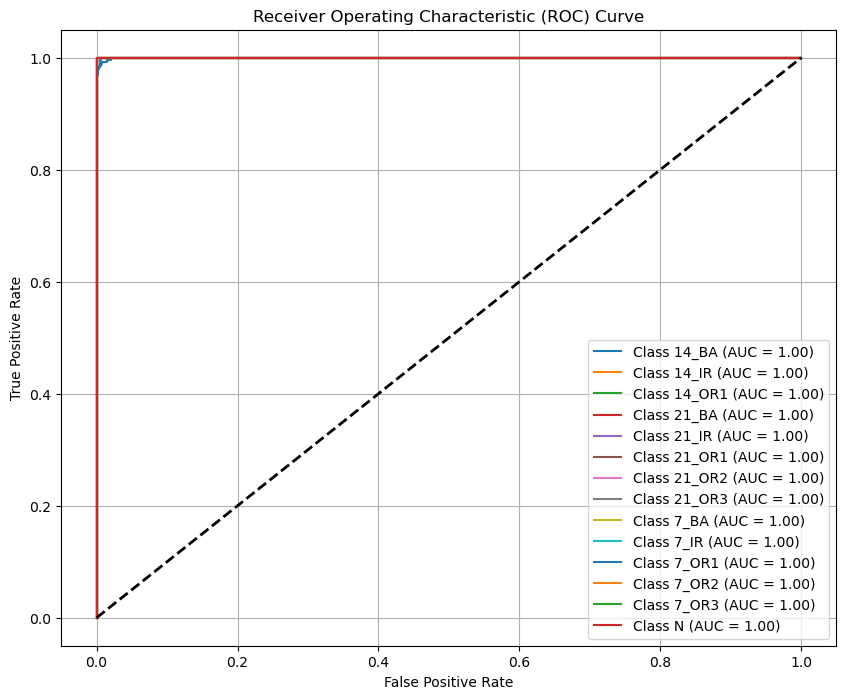

In [64]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Binarize the labels for multi-class ROC
Y_test_bin = label_binarize(Y_test, classes=encoder.classes_)
n_classes = Y_test_bin.shape[1]
y_pred_prob = cnn_model.predict(X_test)
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
   fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_pred_prob[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
   plt.plot(fpr[i], tpr[i], label=f'Class {encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [66]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[-2].output)
y_viz = dummy_cnn.predict(X_train)

203/203 [==============================] - 7s 33ms/step


In [68]:
np.shape(y_viz)

(6481, 100)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6481 samples in 0.000s...
[t-SNE] Computed neighbors for 6481 samples in 1.400s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6481
[t-SNE] Computed conditional probabilities for sample 2000 / 6481
[t-SNE] Computed conditional probabilities for sample 3000 / 6481
[t-SNE] Computed conditional probabilities for sample 4000 / 6481
[t-SNE] Computed conditional probabilities for sample 5000 / 6481
[t-SNE] Computed conditional probabilities for sample 6000 / 6481
[t-SNE] Computed conditional probabilities for sample 6481 / 6481
[t-SNE] Mean sigma: 4.430184
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.385307
[t-SNE] KL divergence after 300 iterations: 1.797469


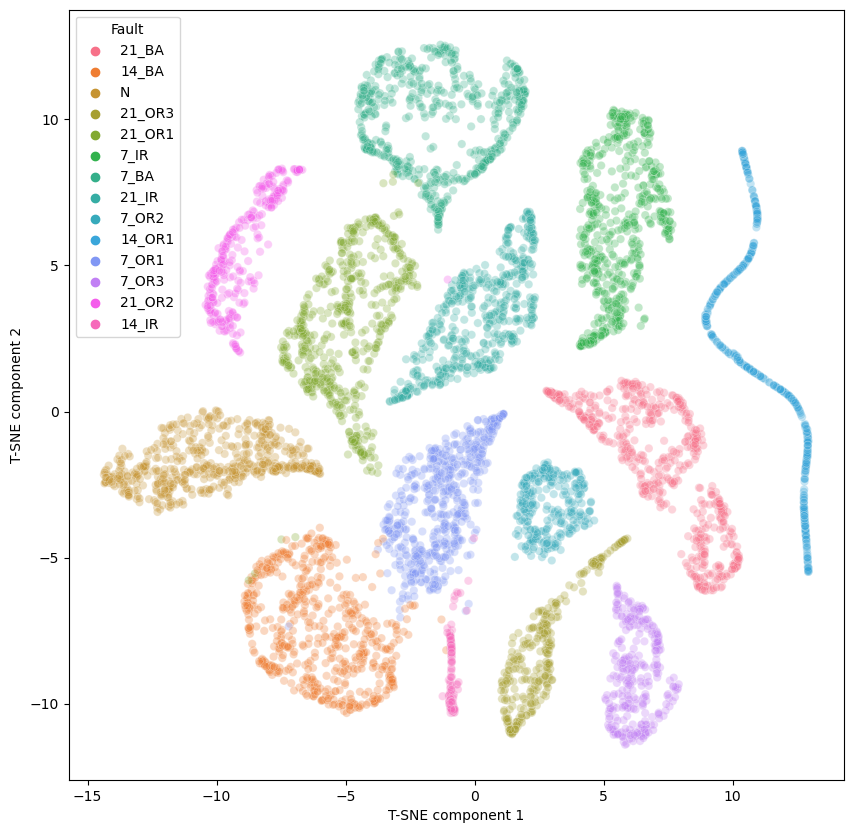

In [70]:
from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto', verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf=pd.DataFrame(data = X_t_sne, columns=['T-SNE component 1', 'T-SNE component 2'])

tSNEdf['Fault']=inv_Transform_result(y_train)


fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['T-SNE component 1'], y=tSNEdf['T-SNE component 2'], hue='Fault',
                data=tSNEdf,
                legend="full",
                alpha=0.3)
plt.show()

In [60]:

cnn_model.save('bearing_fault_model.keras')

In [113]:
cnn_model.save("cnn_model.h5")

C:\Users\marya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [115]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


In [72]:
# Number of samples (rows) used
num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]
print(f"Number of training samples: {num_train_samples}")
print(f"Number of testing samples: {num_test_samples}")

# Training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")

# Training time
import time
start_time = time.time()
history = cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test), shuffle=True)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Testing accuracy
start_time = time.time()
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
testing_time = end_time - start_time
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Testing Time: {testing_time:.2f} seconds")

# Sensitivity (Recall)
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_pred, average='weighted')
print(f"Sensitivity: {sensitivity:.4f}")

# Specificity
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP)
    specificities.append(specificity)

specificity = np.mean(specificities)  # Average specificity for multi-class
print(f"Specificity: {specificity:.4f}")


Number of training samples: 6481
Number of testing samples: 2778
Training Accuracy: 0.9997
Epoch 1/20
22/22 [==============================] - 60s 3s/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0158 - val_accuracy: 0.9946
Epoch 2/20
22/22 [==============================] - 60s 3s/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0142 - val_accuracy: 0.9950
Epoch 3/20
22/22 [==============================] - 60s 3s/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.0158 - val_accuracy: 0.9942
Epoch 4/20
22/22 [==============================] - 60s 3s/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 0.0189 - val_accuracy: 0.9924
Epoch 5/20
22/22 [==============================] - 62s 3s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9935
Epoch 6/20
22/22 [==============================] - 59s 3s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 0.9939
Epoch 7/20
22/22 [==============================] - 61s 3s/step - los